# Plotting Music Data with Matplotlib

These Python scripts use data downloaded from the Last.fm and Spotify databases with the script 'musicfetch.py'.
The data consists of a list of dictionaries with features about the top 100 tracks played by the user. We begin by importing this data using the 'JSON' module in Python.

In [1]:
import json
import os.path
import numpy as np
import matplotlib.pyplot as plt

# To display plot inline in an IPython notebook
%matplotlib inline


# Check if JSON data file exists in folder path and read from it
if os.path.isfile("my_top_tracks.txt"):
    json_data = open("my_top_tracks.txt").read()
    my_top_tracks = json.loads(json_data)
    
else:
    print("Please run musicfetch.py to generate data.")

## Making a Simple Bar Chart

Using matplotlib, we create the first plot: a simple horizontal bar chart which displays playcounts for the top tracks. The data for 'top_tracks' and 'playcount' are pulled from the dictionaries and arranged in simple lists through iteration.

The script also asks for user input on the number of tracks to be plotted, the number is used to slice the list containing the top tracks, and then it is also used to determine the height of the figure, so that it scales in proportion to the number of bars to be plotted.

How many top tracks? 10

Tracks: ['Almost Lover - A Fine Frenzy', 'Breedless - Ego Likeness', 'Energize Me - After Forever', '100 Other Lovers - DeVotchKa', 'The Bed Song - Amanda Palmer & The Grand Theft Orchestra', 'Bad Man - Vermillion Lies', 'Bluebird - The Horse Thieves', 'Song For Samael - Ego Likeness', 'South - Ego Likeness', 'Treacherous Thing - Ego Likeness']

Playcounts: [73, 58, 50, 48, 48, 46, 46, 46, 45, 44]


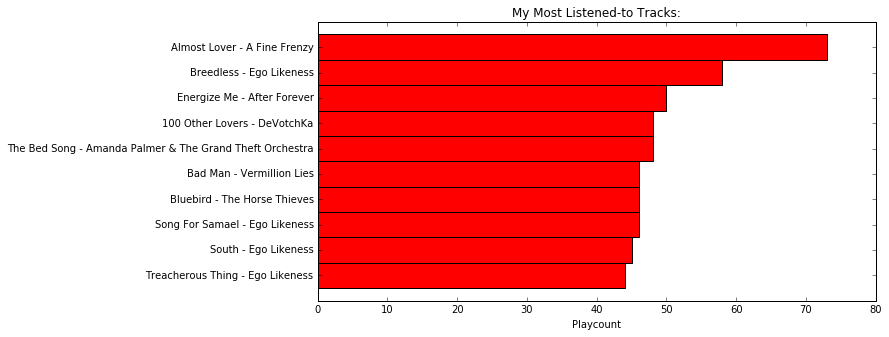

In [2]:
number = int(input("How many top tracks? "))
# Slice data list to use the number entered by user
data = my_top_tracks[:number]

# Setup Figure
fig = plt.figure(figsize=(10, number / 2))
# Create an axis with a 1x1 grid
ax = fig.add_subplot(1, 1, 1)

# Data to plot:
top_tracks = [track['title'] + " - " +track['artist'] for track in data]
print("\nTracks:", top_tracks)
playcount = [track['user_playcount'] for track in data]
print("\nPlaycounts:", playcount)
             
# The position in y for the bars and labels
y_pos = np.arange(len(top_tracks))
# Width of the bars
width = 1

# Create a horizontal bar chart
bch = ax.barh(y_pos + width, playcount, width, color='red', align='center')
# Set range of the y axis
ax.set_ylim([0, number + width])
# Set ticks and labels
plt.yticks(y_pos + width, top_tracks)
plt.xlabel('Playcount')
plt.title('My Most Listened-to Tracks:')

# Invert y-axis so the track with highest playcounts is on top
plt.gca().invert_yaxis()

plt.show()

## Exploring Audio Features: An Interactive Scatter Plot with IPython Widgets

Here, IPython widgets are used to create an interactive scatter plot for some of the audio features in the data file. A description of these audio features and their meaning can be found in: http://developer.echonest.com/acoustic-attributes.html

Like before, we begin by extracting the data from each dictionary into lists, using list comprehension. The lists are then placed in a single dictionary 'audio_feats', and assigned descriptive keys.

The keys are used in dropdown menu widgets so the user can assign any of the various lists as either the dependent or independent variables, or even as the basis for the color of the data points.
A button widget is used as a trigger for refreshing of the image after the variables are modified.

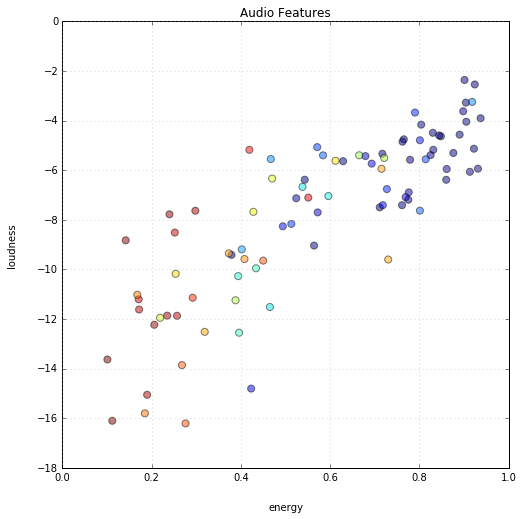

In [3]:
from ipywidgets import *
from IPython.display import display, clear_output


number = int(input("How many top tracks? "))
data = my_top_tracks[:number]

# Create lists for the audio features we can plot
audio_feats = {
               'acousticness': [track.get('acousticness') for track in data],
               'speechiness': [track.get('speechiness') for track in data],
               'energy': [track.get('energy') for track in data],
               'danceability': [track.get('danceability') for track in data],
               'valence': [track.get('valence') for track in data],
               'loudness': [track.get('loudness') for track in data],
               'tempo': [track.get('tempo') for track in data],
               'key': [track.get('key') for track in data],
               'liveness': [track.get('liveness') for track in data],
               'time signature': [track.get('time_signature') for track in data]
              }

# Create dropdown menu widgets to change the value of the lists
# that are used as x and y variables, as well as the color gradient

xlist = widgets.Dropdown(
    options=audio_feats,
    value=audio_feats['energy'],
    description=' X-axis:',
    padding = 4,
)

ylist = widgets.Dropdown(
    options=audio_feats,
    value=audio_feats['danceability'],
    description=' Y-axis:',
    padding = 4,
)

color_by = widgets.Dropdown(
    options=audio_feats,
    value=audio_feats['valence'],
    description=' Color by:',
    padding = 4,
)

# Container for aligning the dropdown widgets
h_container = widgets.HBox(children=[xlist, ylist, color_by], padding = 4)
display(h_container)

# Button for updating the figure
bttn_update = widgets.Button(description="Update Plot", padding = 4)
display(bttn_update)


def plot_audio_features():
    # Setup Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)

    # Create plot
    scatterplt = ax.scatter(xlist.value, ylist.value, s=50, c=color_by.value, alpha=0.5)
    
    ax.grid(color='#b2b2b2', linestyle='dotted')

    # Labels
    plt.ylabel(ylist.selected_label)
    plt.xlabel(xlist.selected_label)
    plt.title('Audio Features')
    ax.xaxis.labelpad=20
    ax.yaxis.labelpad=20
    
plot_audio_features()

# If button is clicked, clear cell and plot figure again
def on_button_clicked(b):
    clear_output()
    plot_audio_features()

# Event handler for clicking on the button
bttn_update.on_click(on_button_clicked)
